In [36]:
## importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("height-weight.csv")

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

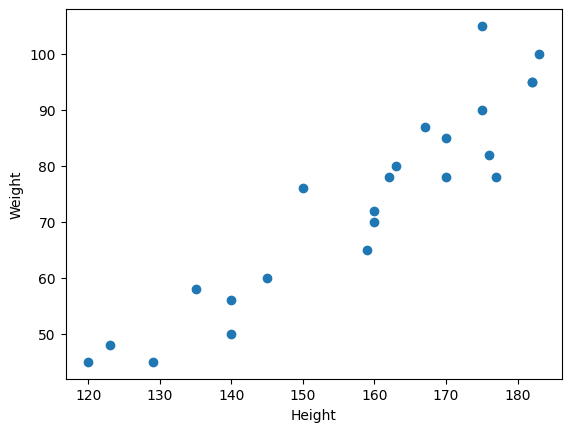

In [8]:
## scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [9]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


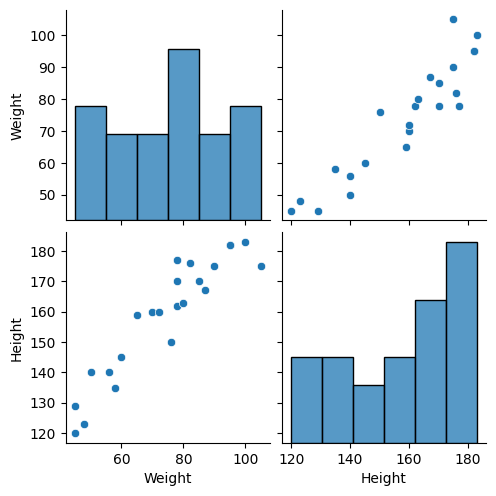

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
## Independent features and dependent features
X = df[['Weight']] ## independent features should be dataframe of 2 dimensional
y = df['Height']

In [12]:
X.shape

(23, 1)

In [13]:
y.shape

(23,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape

(17, 1)

In [16]:
## Standardization 
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [22]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [17.2982057]
Intercept 156.47058823529412


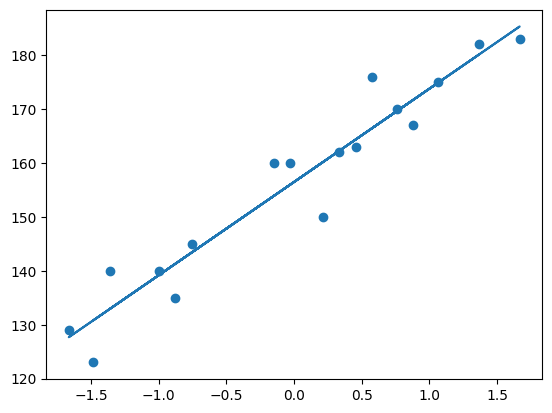

In [24]:
## Plot training data plot best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. predicted height output = intercept + coef_(weights)
2. y_pred_test = 156.470 +17.29(X_test)

In [25]:
## Prediction for test data 
y_pred=regression.predict(X_test)

In [26]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

9.66512588679501
114.84069295228699
10.716374991212605


### R squared
formula
R^2 = 1-SSR/SST

In [28]:
from sklearn.metrics import r2_score

In [29]:
score = r2_score(y_test,y_pred)
score

0.7360826717981276

## Adjusted R2 Square
formula adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

In [30]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [31]:
## OLS linear regression 
import statsmodels.api as sm

In [32]:
model=sm.OLS(y_train,X_train).fit()

In [34]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                       0.664
Time:                        17:43:08   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
